In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import os
cwd= os.getcwd()
path = os.path.join(cwd,'data')

In [2]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

X_train,Y_train, X_test, Y_test, classes = load_dataset()

In [3]:
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


In [4]:
m_train = X_train.shape[0]
num_px = X_train.shape[1] 
m_test = X_test.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


y = [0], it's a 'non-cat' picture.


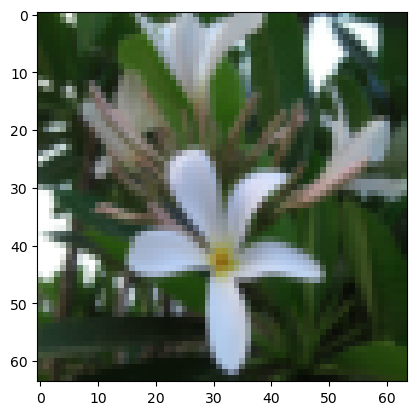

In [5]:
index = 9
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [6]:
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


In [7]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)  # Розгорнути вектори для кожного зображення
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


In [8]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.
def sigmoid(z):
    return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def initialize_with_zeros(dim):
    w = np.zeros((1, dim))
    b = 0.0

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = {:.0f}".format(b))

w = [[0. 0.]]
b = 0


In [11]:
def propagate(w, b, X, Y, C=1):
    m = X.shape[0]
    
    # Пряме поширення (Forward Propagation)
    Z = np.dot(X, w.T) + b  # Обчислити ваговану суму
    A = sigmoid(Z)  # Обчислити активацію (сигмоїд)
    
    # Обчислення функції втрат
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + C/(2*m) * np.sum(w * w)
    
    # Зворотне поширення (Backward Propagation)
    dJ_dw = 1/m * np.dot((A - Y).T, X) + C/m * w
    dJ_db = 1/m * np.sum(A - Y)

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)

    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}

    return grads, cost

w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print ("dJ_dw = " + str(grads["dJ_dw"]))
print ("dJ_db = " + str(grads["dJ_db"]))
print ("cost = " + str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C=1, verbose=False):
    costs = []  # Список для зберігання значень витрат

    for i in range(num_iterations):
        # Обчислити витрати та градієнти
        grads, cost = propagate(w, b, X, Y, C)

        # Отримати градієнти
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]

        # Оновити параметри
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db

        # Записати витрати
        if i % 100 == 0:
            costs.append(cost)

        # Вивести витрати через кожні 100 ітерацій, якщо verbose=True
        if verbose and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w, "b": b}
    grads = {"dJ_dw": dJ_dw, "dJ_db": dJ_db}

    return params, grads, costs
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479


In [13]:
def predict(w, b, X):
    m, n = X.shape
    assert (w.shape == (1, n))
    A = sigmoid(np.dot(X, w.T) + b)

    Y_prediction = (A > 0.5).astype(int)

    assert (Y_prediction.shape == (m, 1))

    return Y_prediction

w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))

predictions = 
[[1]
 [1]
 [0]]


In [23]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, verbose=False, C=1):
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    train_accuracy = np.mean(Y_prediction_train == Y_train)
    test_accuracy = np.mean(Y_prediction_test == Y_test)
    print("Train accuracy: {:.3%}".format(train_accuracy))
    print("Test accuracy: {:.3%}".format(test_accuracy))
    
    res = {
        'costs': costs,
        'Y_prediction_test': Y_prediction_test, 
        'Y_prediction_train': Y_prediction_train, 
        'w': w, 
        'b': b,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations,
        'C': C
    }
    
    return res

res = model(X_train=X_train_scaled,
            Y_train=Y_train, 
            X_test=X_test_scaled, 
            Y_test=Y_test, 
            num_iterations=1000, 
            learning_rate=0.01, 
            verbose=True,
            C=0.3 
           )

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.415955
Cost after iteration 200: 0.429003
Cost after iteration 300: 0.615849
Cost after iteration 400: 0.526897
Cost after iteration 500: 0.395729
Cost after iteration 600: 0.245941
Cost after iteration 700: 0.159106
Cost after iteration 800: 0.138930
Cost after iteration 900: 0.128859
Train accuracy: 98.565%
Test accuracy: 70.000%
